# Overview

This code is designed to take as input the [NASP Tournaments](https://nasptournaments.org/Schoolmgr/SeasonScoreSheet.aspx?oid=381) Archery Season Score Sheets and generate basic archery performance and plots. The scoresheets will be exported and stored in an S3 bucket.

**Stretch Goal** Build an HTML parser that receives a school ID and calls the NASP Tournament site, parses HTML and creates plots.



In [4]:
pip install s3fs

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Read from the S3 Bucket
import pandas as pd
import s3fs
import boto3
fs = s3fs.S3FileSystem()

bucket='scpa-data'
data_key = 'NASPSeasonScoreSheet.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
NASPData=pd.read_csv(data_location)
NASPData.head()


,TOURNAMENT_ID,TOURNAMENT_NAME,RANGE_TYPE,ARCHER_HISTORY_ID,FIRST_NAME,LAST_NAME,GENDER,GRADE,SHOOTER_NBR,SCORE,...,A_26,A_27,A_28,A_29,A_30,USE_FOR_TEAM,TEAM_NAME,TEAM_ID,SEASON,END_DATE
0,5472,Faribault Falcon Classic,1015,369560,Thomas,Bahneman,M,5,10042,202,...,7,7,7,6,2,Y,ELEMENTARY Team #1,186258,2019-2020,1/11/2020 12:00:00 AM
1,5472,Faribault Falcon Classic,1015,370601,Abby,Bradley,F,5,10040,169,...,0,0,1,1,4,Y,ELEMENTARY Team #1,186258,2019-2020,1/11/2020 12:00:00 AM
2,5472,Faribault Falcon Classic,1015,369575,Hudson,Lauenstein,F,5,10099,262,...,10,9,9,9,8,Y,ELEMENTARY Team #1,186258,2019-2020,1/11/2020 12:00:00 AM
3,5472,Faribault Falcon Classic,1015,369577,Tyson,Most,M,5,10097,239,...,9,8,8,5,2,Y,ELEMENTARY Team #1,186258,2019-2020,1/11/2020 12:00:00 AM
4,5472,Faribault Falcon Classic,1015,369578,Emma,Peterson,F,5,10246,208,...,9,9,4,7,2,Y,ELEMENTARY Team #1,186258,2019-2020,1/11/2020 12:00:00 AM


In [29]:
from datetime import datetime
ArcherScore=[]
ArcherName=[]
IndexList=[]
TournamentDate=[]
for currItem in range(len(NASPData)):
    #print('%i'% currItem)
    #print(NASPData.loc[currItem]['LAST_NAME'])
    # 1/11/2020 12:00:00 AM
    TournamentDate.append(datetime.strptime(NASPData.loc[currItem]['END_DATE'],'%m/%d/%Y %I:%M:%S %p'))
    ArcherScore.append(NASPData.loc[currItem]['SCORE'])
    IndexList.append(currItem)
    ArcherName.append('{}-{}'.format(NASPData.loc[currItem]['LAST_NAME'],NASPData.loc[currItem]['FIRST_NAME']))

    # print('%s(%s):%i' % (ArcherName,TournamentDate,ArcherScore))

data = {'NAME':ArcherName, 'DATE':TournamentDate, 'SCORE':ArcherScore} 

df = pd.DataFrame(data) 
#df

ArcherSeriesData=df.loc[df['NAME'] == 'STANKIEWICZ-NICHOLAS']


In [12]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with fig.show()"
)


In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Position (km)')

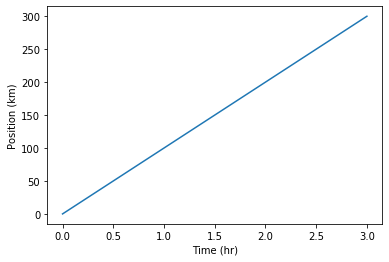

In [14]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

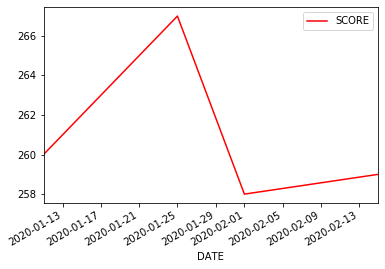

In [30]:
ArcherSeriesData.plot(kind='line',x='DATE',y='SCORE',color='red')
plt.show()